In [62]:
library(data.table)
library(ggplot2)
# library(hrbrthemes)
library(reshape2)
library(tidyverse)
library(stringr)
library(heatmaply)
library(ape)
library(phylogram)
library(dendextend)
# library(glob)
library(tidyr)       # consistent data.frame cleaning
library(gridExtra)   # a helper for arranging individual ggplot objects
# library(ggthemes)    # has a clean theme for ggplot2
# library(scales)
library(ggpubr)
library(circlize)
library(ComplexHeatmap)
theme_set(theme_bw())

circlize version 0.4.14
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))



Attaching package: ‘circlize’


The following object is masked from ‘package:ape’:

    degree




In [56]:
get_ani <- function(
    path="/mnt/hpccs01/scratch/microbiome/n10853499/00-rosella_testing/02-activated_sludge/assembly/00-singleton_analysis/05-lorikeet_call/rosella_bin.1519_EsbE_18-Q3-R3-47", 
    header=header,
    ani_type="consensus"
) {

    ani <- fread(Sys.glob(paste0(path, "/", "*_", ani_type, "_ani.tsv")), skip="SampleID",)
    colnames(ani) <- c("SampleID", header$sample_name)
    genome_name <- gsub("^.*/", "", path)
    # sample_labels
    ani[, SampleID:=factor(SampleID)]
    ani <- full_join(ani, header, by=c("SampleID"))
    ani[, genome:=genome_name]

    return(ani)
}

get_all_ani_in_directory <- function(
    directory="/mnt/hpccs01/scratch/microbiome/n10853499/00-rosella_testing/02-activated_sludge/assembly/00-singleton_analysis/05-lorikeet_call/", 
    sample_ids="/mnt/hpccs01/scratch/microbiome/n10853499/00-rosella_testing/02-activated_sludge/assembly/00-singleton_analysis/sample_ids.txt",
    sample_to_sra="/mnt/hpccs01/scratch/microbiome/n10853499/00-rosella_testing/02-activated_sludge/assembly/00-singleton_analysis/sample_to_sra.tsv",
    coverages="/mnt/hpccs01/scratch/microbiome/n10853499/00-rosella_testing/02-activated_sludge/assembly/00-singleton_analysis/singleton_coverages.tsv"
) {
    sample_to_sra <- fread(sample_to_sra, header=FALSE)
    sample_to_sra[, sample_name:=V1]
    sample_to_sra[, V1:=NULL]
    header <- fread(sample_ids)
    header[, SampleID:=factor(V1)]

    header[, V1:=NULL]
    header[, sra_id:=V2]
    header[, V2:=NULL]

    header <- inner_join(header, sample_to_sra, by=c("sra_id" = "V2"))
    coverages <- fread(coverages)
    colnames(coverages) <- c("Genome", sample_to_sra$sample_name)
    
    
    all_con_ani <- lapply(list.dirs(directory, recursive=FALSE), function(x) {get_ani(x, header, ani_type="consensus")})
    all_con_ani <- do.call(rbind, all_con_ani)
    all_con_ani <- full_join(all_con_ani, melt(coverages), by=c("genome"="Genome", "sample_name"="variable"))
    
    all_pop_ani <- lapply(list.dirs(directory, recursive=FALSE), function(x) {get_ani(x, header, ani_type="population")})
    all_pop_ani <- do.call(rbind, all_pop_ani)
    all_pop_ani <- full_join(all_pop_ani, melt(coverages), by=c("genome"="Genome", "sample_name"="variable"))
    
    all_sub_ani <- lapply(list.dirs(directory, recursive=FALSE), function(x) {get_ani(x, header, ani_type="subpopulation")})
    all_sub_ani <- do.call(rbind, all_sub_ani)
    all_sub_ani <- full_join(all_sub_ani, melt(coverages), by=c("genome"="Genome", "sample_name"="variable"))
    
    return(list(con=all_con_ani, pop=all_pop_ani, sub=all_sub_ani))
}

In [57]:

all_ani_values <- get_all_ani_in_directory()

Warning message in `[.data.table`(ani, , `:=`(genome, genome_name)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently (and oddly) may copy the whole data.table. Use set* syntax instead to avoid copying: ?set, ?setnames and ?setattr. If this message doesn't help, please report your use case to the data.table issue tracker so the root cause can be fixed or this message improved.”
Warning message in `[.data.table`(ani, , `:=`(genome, genome_name)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently

Warning message in `[.data.table`(ani, , `:=`(genome, genome_name)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently (and oddly) may copy the whole data.table. Use set* syntax instead to avoid copying: ?set, ?setnames and ?setattr. If this message doesn't help, please report your use case to the data.table issue tracker so the root cause can be fixed or this message improved.”
Warning message in `[.data.table`(ani, , `:=`(genome, genome_name)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently

Warning message in `[.data.table`(ani, , `:=`(genome, genome_name)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently (and oddly) may copy the whole data.table. Use set* syntax instead to avoid copying: ?set, ?setnames and ?setattr. If this message doesn't help, please report your use case to the data.table issue tracker so the root cause can be fixed or this message improved.”
Warning message in `[.data.table`(ani, , `:=`(genome, genome_name)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently

Warning message in `[.data.table`(ani, , `:=`(genome, genome_name)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently (and oddly) may copy the whole data.table. Use set* syntax instead to avoid copying: ?set, ?setnames and ?setattr. If this message doesn't help, please report your use case to the data.table issue tracker so the root cause can be fixed or this message improved.”
Warning message in `[.data.table`(ani, , `:=`(genome, genome_name)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently

Warning message in `[.data.table`(ani, , `:=`(genome, genome_name)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently (and oddly) may copy the whole data.table. Use set* syntax instead to avoid copying: ?set, ?setnames and ?setattr. If this message doesn't help, please report your use case to the data.table issue tracker so the root cause can be fixed or this message improved.”
Warning message in `[.data.table`(ani, , `:=`(genome, genome_name)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently

Warning message in `[.data.table`(ani, , `:=`(genome, genome_name)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently (and oddly) may copy the whole data.table. Use set* syntax instead to avoid copying: ?set, ?setnames and ?setattr. If this message doesn't help, please report your use case to the data.table issue tracker so the root cause can be fixed or this message improved.”
Warning message in `[.data.table`(ani, , `:=`(genome, genome_name)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently

Warning message in `[.data.table`(ani, , `:=`(genome, genome_name)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently (and oddly) may copy the whole data.table. Use set* syntax instead to avoid copying: ?set, ?setnames and ?setattr. If this message doesn't help, please report your use case to the data.table issue tracker so the root cause can be fixed or this message improved.”
Warning message in `[.data.table`(ani, , `:=`(genome, genome_name)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently

Warning message in `[.data.table`(ani, , `:=`(genome, genome_name)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently (and oddly) may copy the whole data.table. Use set* syntax instead to avoid copying: ?set, ?setnames and ?setattr. If this message doesn't help, please report your use case to the data.table issue tracker so the root cause can be fixed or this message improved.”
Warning message in `[.data.table`(ani, , `:=`(genome, genome_name)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently

Warning message in `[.data.table`(ani, , `:=`(genome, genome_name)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently (and oddly) may copy the whole data.table. Use set* syntax instead to avoid copying: ?set, ?setnames and ?setattr. If this message doesn't help, please report your use case to the data.table issue tracker so the root cause can be fixed or this message improved.”
Warning message in `[.data.table`(ani, , `:=`(genome, genome_name)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently

Warning message in `[.data.table`(ani, , `:=`(genome, genome_name)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently (and oddly) may copy the whole data.table. Use set* syntax instead to avoid copying: ?set, ?setnames and ?setattr. If this message doesn't help, please report your use case to the data.table issue tracker so the root cause can be fixed or this message improved.”
Warning message in `[.data.table`(ani, , `:=`(genome, genome_name)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently

Warning message in `[.data.table`(ani, , `:=`(genome, genome_name)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently (and oddly) may copy the whole data.table. Use set* syntax instead to avoid copying: ?set, ?setnames and ?setattr. If this message doesn't help, please report your use case to the data.table issue tracker so the root cause can be fixed or this message improved.”
Warning message in `[.data.table`(ani, , `:=`(genome, genome_name)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently

Warning message in `[.data.table`(ani, , `:=`(genome, genome_name)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently (and oddly) may copy the whole data.table. Use set* syntax instead to avoid copying: ?set, ?setnames and ?setattr. If this message doesn't help, please report your use case to the data.table issue tracker so the root cause can be fixed or this message improved.”
Warning message in `[.data.table`(ani, , `:=`(genome, genome_name)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently

Warning message in `[.data.table`(ani, , `:=`(genome, genome_name)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently (and oddly) may copy the whole data.table. Use set* syntax instead to avoid copying: ?set, ?setnames and ?setattr. If this message doesn't help, please report your use case to the data.table issue tracker so the root cause can be fixed or this message improved.”
Warning message in `[.data.table`(ani, , `:=`(genome, genome_name)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently

In [126]:
sample_to_sra <- fread("/mnt/hpccs01/scratch/microbiome/n10853499/00-rosella_testing/02-activated_sludge/assembly/00-singleton_analysis/sample_to_sra.tsv", header=FALSE)
abundances <- fread("/mnt/hpccs01/scratch/microbiome/n10853499/00-rosella_testing/02-activated_sludge/assembly/00-singleton_analysis/singleton_abundances.tsv")
colnames(abundances) <- c("Genome", sample_to_sra$V1)
abundances_melt <- as.data.table(melt(abundances[Genome != "unmapped"]))
abundances_melt[, plot:="abundance"]
# a_plot <- ggplot(abundances_melt, aes(fill=value, y=Genome, x=variable)) + 
#     geom_tile() + 
#     labs(fill="Relative\nabundance (%)", x = "Sample", y = "Genome") + 
#     scale_fill_viridis(option="magma") + 
# #     geom_text(aes(y=assembly_size + 3500000, x=assembler, label=max_contig_size), size=2) + 
#     theme(panel.grid.major = element_blank(),
#           panel.grid.minor = element_blank(),
#           legend.position="right",
#           legend.direction="vertical", 
#           legend.text=element_text(size=10),
#           axis.text.x=element_blank(),
#           axis.title.x=element_blank()
#         )

# coverages <- fread("/mnt/hpccs01/scratch/microbiome/n10853499/00-rosella_testing/02-activated_sludge/assembly/00-singleton_analysis/singleton_coverages.tsv")
# colnames(coverages) <- c("Genome", sample_to_sra$V1)
# coverages_melt <- as.data.table(melt(coverages[Genome != "unmapped"]))
# coverages_melt[, plot:="coverage"]
# c_plot <- ggplot(coverages_melt, aes(fill=value, y=Genome, x=variable)) + 
#     geom_tile() + 
#     labs(fill="Coverage         ", x = "Sample", y = "Genome") + 
#     scale_fill_viridis(option="magma") + 
# #     geom_text(aes(y=assembly_size + 3500000, x=assembler, label=max_contig_size), size=2) + 
#     theme(panel.grid.major = element_blank(),
#           panel.grid.minor = element_blank(),
#           legend.position="right",
#           legend.direction="vertical", 
#           legend.text=element_text(size=10),
#           axis.text.x=element_text(angle=45, hjust=1, vjust=1)
#          )

# ?scale_fill_viridis
# ggarrange(a_plot, c_plot, nrow=2, heights=c(0.43, 0.57))
# ggsave("singleton_abundances_coverages.png", width=8, height=12, dpi=60
# lapply(unique(all_ani_values$con$genome), function(x) {
#     print(x)
#     print(all_ani_values$con[genome==x])
#     }
#       )
all_ani_values$con
# melt(coverages)

Using Genome as id variables



SampleID,Aved_18-Q3-R54-62,Viby_18-Q3-R106-67,Vibo_18-Q3-R45-57,Skiv_18-Q3-R9-52,Ribe_18-Q3-R11-54,Rand_18-Q3-R56-63,OdNW_18-Q3-R42-56,OdNE_18-Q3-R46-58,AalW_18-Q3-R10-53,⋯,EsbE_18-Q3-R3-47,Ejby_18-Q3-R6-50,AalE_18-Q3-R2-46,Ega_18-Q3-R5-49,Damh_18-Q3-R51-60,Bjer_18-Q3-R1-45,sra_id,sample_name,genome,value
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,⋯,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,SRR11673976,Aved_18-Q3-R54-62,rosella_bin.1368_Kalu_18-Q3-R12-55,0.0000000
2,1.0000000,0.9999965,0.9999975,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,⋯,0.9999977,0.9999991,1.0000000,1.0000000,0.9999991,0.9999991,SRR11673989,Viby_18-Q3-R106-67,rosella_bin.1368_Kalu_18-Q3-R12-55,0.0000000
3,1.0000000,0.9999975,0.9999927,1.0000000,1.0000000,1.0000000,1.0000000,0.9999986,1.0000000,⋯,0.9999998,0.9999988,0.9999998,0.9999998,0.9999984,0.9999986,SRR11673992,Vibo_18-Q3-R45-57,rosella_bin.1368_Kalu_18-Q3-R12-55,0.0000000
4,1.0000000,1.0000000,1.0000000,0.9999972,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,⋯,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,SRR11673995,Skiv_18-Q3-R9-52,rosella_bin.1368_Kalu_18-Q3-R12-55,0.0000000
5,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,⋯,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,SRR11673999,Ribe_18-Q3-R11-54,rosella_bin.1368_Kalu_18-Q3-R12-55,0.0000000
6,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,0.9999995,1.0000000,1.0000000,1.0000000,⋯,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,SRR11674002,Rand_18-Q3-R56-63,rosella_bin.1368_Kalu_18-Q3-R12-55,0.6185719
7,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,0.9999961,1.0000000,1.0000000,⋯,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,SRR11674005,OdNW_18-Q3-R42-56,rosella_bin.1368_Kalu_18-Q3-R12-55,0.0000000
8,1.0000000,1.0000000,0.9999986,1.0000000,1.0000000,1.0000000,1.0000000,0.9999887,1.0000000,⋯,0.9999988,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,SRR11674008,OdNE_18-Q3-R46-58,rosella_bin.1368_Kalu_18-Q3-R12-55,0.0000000
9,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,0.9999995,⋯,1.0000000,0.9999988,1.0000000,1.0000000,0.9999991,0.9999991,SRR11674009,AalW_18-Q3-R10-53,rosella_bin.1368_Kalu_18-Q3-R12-55,0.0000000


In [25]:
sample_to_sra <- fread("/mnt/hpccs01/scratch/microbiome/n10853499/00-rosella_testing/02-activated_sludge/assembly/00-singleton_analysis/sample_to_sra.tsv", header=FALSE)
header <- fread("/mnt/hpccs01/scratch/microbiome/n10853499/00-rosella_testing/02-activated_sludge/assembly/00-singleton_analysis/sample_ids.txt")
header[, SampleID:=factor(V1)]

header[, V1:=NULL]
header[, sample_name:=V2]
header[, V2:=NULL]

# inner_join(header, sample_to_sra, by=c("sample_name" = "V2"))
melt(all_ani_values$con)

Using SampleID, sra_id, sample_name, genome as id variables



SampleID,sra_id,sample_name,genome,variable,value
<fct>,<chr>,<chr>,<chr>,<fct>,<dbl>
1,SRR11673976,Aved_18-Q3-R54-62,rosella_bin.1368_Kalu_18-Q3-R12-55,Aved_18-Q3-R54-62.x,1.0000000
2,SRR11673989,Viby_18-Q3-R106-67,rosella_bin.1368_Kalu_18-Q3-R12-55,Aved_18-Q3-R54-62.x,1.0000000
3,SRR11673992,Vibo_18-Q3-R45-57,rosella_bin.1368_Kalu_18-Q3-R12-55,Aved_18-Q3-R54-62.x,1.0000000
4,SRR11673995,Skiv_18-Q3-R9-52,rosella_bin.1368_Kalu_18-Q3-R12-55,Aved_18-Q3-R54-62.x,1.0000000
5,SRR11673999,Ribe_18-Q3-R11-54,rosella_bin.1368_Kalu_18-Q3-R12-55,Aved_18-Q3-R54-62.x,1.0000000
6,SRR11674002,Rand_18-Q3-R56-63,rosella_bin.1368_Kalu_18-Q3-R12-55,Aved_18-Q3-R54-62.x,1.0000000
7,SRR11674005,OdNW_18-Q3-R42-56,rosella_bin.1368_Kalu_18-Q3-R12-55,Aved_18-Q3-R54-62.x,1.0000000
8,SRR11674008,OdNE_18-Q3-R46-58,rosella_bin.1368_Kalu_18-Q3-R12-55,Aved_18-Q3-R54-62.x,1.0000000
9,SRR11674009,AalW_18-Q3-R10-53,rosella_bin.1368_Kalu_18-Q3-R12-55,Aved_18-Q3-R54-62.x,1.0000000


In [243]:
generate_heatmap_single_genome <-function(input_table, to_select=seq(1,23), current="rosella_bin.1368_Kalu_18-Q3-R12-55") {
    min_ani <- min(input_table$con[genome==current, to_select + 1, with=FALSE], input_table$pop[genome==current, to_select + 1, with=FALSE], input_table$sub[genome==current, to_select + 1, with=FALSE])
    print(current)
    print(min_ani)
    col_fun <- colorRamp2(c(min_ani, (1 + min_ani) / 2, 1), c("#2c7fb8", "#7fcdbb", "#edf8b1"))
    con <- input_table$con[genome==current]
    con <- as.matrix(con[to_select, to_select + 1, with=FALSE])
#     con 
#     print(input_table$con[genome==genome]$sra_id[to_select])
    rownames(con) <- input_table$con[genome==current]$sra_id[to_select]
    colnames(con) <- input_table$con[genome==current]$sra_id[to_select]

    row_loc <- rowAnnotation(`Log10(Cov.)`=anno_barplot(log10(input_table$con[genome==current]$value[to_select] + 1)), annotation_name_rot = 90)
    ha_con <- Heatmap(con, name="ANI", left_annotation=row_loc, column_title="conANI", col=col_fun, row_order=rownames(con))
    
    # population
    pop <- input_table$pop[genome==current]
    pop <- as.matrix(pop[to_select, to_select + 1, with=FALSE])
    rownames(pop) <- input_table$pop[genome==current]$sra_id[to_select]
    colnames(pop) <- input_table$pop[genome==current]$sra_id[to_select]
    
    ha_pop <- Heatmap(pop, name="ANI", column_title="popANI", col=col_fun, row_order=rownames(pop))
    
    # sub population
    sub_pop <- input_table$sub[genome==current]
    sub_pop <- as.matrix(sub_pop[to_select, to_select + 1, with=FALSE])
    rownames(sub_pop) <- input_table$sub[genome==current]$sra_id[to_select]
    colnames(sub_pop) <- input_table$sub[genome==current]$sra_id[to_select]

    ha_sub_pop <- Heatmap(sub_pop, name="ANI", column_title="subpopANI", col=col_fun, row_names_side="right", row_order=rownames(sub_pop))
    ht_list = ha_con + ha_pop + ha_sub_pop
#     ht_list <- Heatmap(con, name="ANI", left_annotation=row_loc, column_title="conANI", col=col_fun, 
#                        right_annotation=rowAnnotation(popANI = pop, subpopANI=sub_pop,
#                                             col=list(
#                                             `popANI`=col_fun,
#                                             `subpopANI`=col_fun
#                                             ), show_legend = c(FALSE, FALSE), border=c(TRUE, TRUE)
#                                             ))
    return(ht_list)
}

generate_heatmap <- function(input_table, to_select=seq(1,23)) {
    # Consensus heatmap
    min_ani <- min(input_table$con[, to_select + 1, with=FALSE], input_table$pop[, to_select + 1, with=FALSE], input_table$sub[, to_select + 1, with=FALSE])
    col_fun <- colorRamp2(c(min_ani, (1 + min_ani) / 2, 1), c("#2c7fb8", "#7fcdbb", "#edf8b1"))
    
    genomes <- unique(input_table$con$genome)
#     print(genomes)
    all_con <- NULL
    all_pop <- NULL
    all_sub <- NULL
    all_not_concat <- list()
    i <- 1
#     for (genome in genomes) {
#         current_hm <- generate_heatmap_single_genome(input_table, to_select, genome=genome)
# #         all_con <- all_con %v% current_hm[[1]]
# #         all_pop <- all_pop %v% current_hm[[2]]
# #         all_sub <- all_sub %v% current_hm[[3]]
# #         combined <- current_hm[[1]] + current_hm[[2]] + current_hm[[3]]
#         all_not_concat[[i]] <- current_hm
#         i <- i + 1
#     }
#     lapply(genomes, function(x)  {
#             combined <- generate_heatmap_single_genome(input_table, to_select, current=x)
#             png(paste0("activated_sludge_plots/", x, "_ani.png"), width=13, height=6, units="in", res=1200)
#             draw(combined, merge_legend=T, column_title=paste("ANI distributions", x), heatmap_legend_side = "right", annotation_legend_side = "bottom")
#             dev.off()
#         }
#     )
    all_hm <- lapply(genomes, function(x)
            generate_heatmap_single_genome(input_table, to_select, current=x)
    )
    return(all_hm)
}


In [244]:
heatmaps <- generate_heatmap(all_ani_values)

[1] "rosella_bin.1368_Kalu_18-Q3-R12-55"
[1] 0.9983402


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.1369_Kalu_18-Q3-R12-55"
[1] 0.9988864


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.1370_Kalu_18-Q3-R12-55"
[1] 0.9996703


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.1372_Kalu_18-Q3-R12-55"
[1] 0.9994047


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.1374_Kalu_18-Q3-R12-55"
[1] 0.9997057


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.1376_Kalu_18-Q3-R12-55"
[1] 0.9977331


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.1377_Kalu_18-Q3-R12-55"
[1] 0.9990499


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.1378_Kalu_18-Q3-R12-55"
[1] 0.9997024


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.1379_Kalu_18-Q3-R12-55"
[1] 0.999967


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.1380_Kalu_18-Q3-R12-55"
[1] 0.9993912


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.1383_Kalu_18-Q3-R12-55"
[1] 0.9998053


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.1384_Kalu_18-Q3-R12-55"
[1] 0.9991465


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.1385_Kalu_18-Q3-R12-55"
[1] 0.9988946


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.1387_Kalu_18-Q3-R12-55"
[1] 0.9976132


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.1388_Kalu_18-Q3-R12-55"
[1] 0.9986736


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.1391_Kalu_18-Q3-R12-55"
[1] 0.9995215


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.1421_Kalu_18-Q3-R12-55"
[1] 0.9975455


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.1519_EsbE_18-Q3-R3-47"
[1] 0.9994022


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.1520_EsbE_18-Q3-R3-47"
[1] 0.9935616


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.1536_EsbE_18-Q3-R3-47"
[1] 0.9992939


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.1648_Vibo_18-Q3-R45-57"
[1] 0.9891516


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.1773_Ega_18-Q3-R5-49"
[1] 0.9985333


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.1774_Ega_18-Q3-R5-49"
[1] 0.9989625


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.1904_Bjer_18-Q3-R1-45"
[1] 0.9941652


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.1934_Viby_18-Q3-R106-67"
[1] 0.9957916


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.1940_Rand_18-Q3-R56-63"
[1] 0.9979233


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.1960_Damh_18-Q3-R51-60"
[1] 0.9988362


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.1965_Mari_18-Q3-R65-66"
[1] 0.996542


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.2060_Damh_18-Q3-R51-60"
[1] 0.9949752


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.2135_OdNW_18-Q3-R42-56"
[1] 0.9987849


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.2262_EsbW_18-Q3-R4-48"
[1] 0.998944


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.2265_EsbW_18-Q3-R4-48"
[1] 0.9983936


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.2299_EsbW_18-Q3-R4-48"
[1] 0.9988807


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.2384_Ribe_18-Q3-R11-54"
[1] 0.9995096


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.2550_OdNE_18-Q3-R46-58"
[1] 0.9958489


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.2714_Skiv_18-Q3-R9-52"
[1] 0.9877578


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.3014_Lyne_18-Q3-R50-59"
[1] 0.9832587


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.3015_Lyne_18-Q3-R50-59"
[1] 0.9994307


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.3019_Lyne_18-Q3-R50-59"
[1] 0.9955521


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.3021_Lyne_18-Q3-R50-59"
[1] 0.9972446


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.3273_Hade_18-Q3-R52-61"
[1] 0.9997638


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.3491_Aved_18-Q3-R54-62"
[1] 0.9974781


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.3603_Fred_18-Q3-R57-64"
[1] 0.9894311


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.3608_Fred_18-Q3-R57-64"
[1] 0.9981238


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.3609_Fred_18-Q3-R57-64"
[1] 0.9980894


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.3611_Fred_18-Q3-R57-64"
[1] 0.9986979


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.3612_Fred_18-Q3-R57-64"
[1] 0.9998542


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.3614_Fred_18-Q3-R57-64"
[1] 0.9994869


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.3616_Fred_18-Q3-R57-64"
[1] 0.9992197


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.3618_Fred_18-Q3-R57-64"
[1] 0.9891919


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.3620_Fred_18-Q3-R57-64"
[1] 0.9997397


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.3621_Fred_18-Q3-R57-64"
[1] 0.9999476


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.3622_Fred_18-Q3-R57-64"
[1] 0.9982475


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_bin.4086_AalW_18-Q3-R10-53"
[1] 0.9991974


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


[1] "rosella_refine.1594_Ribe_18-Q3-R11-54"
[1] 0.9924011


Warning message:
“Heatmap/annotation names are duplicated: ANI”
Warning message:
“Heatmap/annotation names are duplicated: ANI, ANI”


In [246]:
grid.arrange(heatmaps[[1]], heatmaps[[2]], heatmaps[[3]], heatmaps[[4]], ncol=4)

ERROR: Error in `$<-`(`*tmp*`, wrapvp, value = vp): no method for assigning subsets of this S4 class


In [211]:
# test <- heatmaps[[1]] %v% heatmaps[[2]]
draw(heatmaps[[4]])

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'object' in selecting a method for function 'draw': this S4 class is not subsettable


In [240]:
png("activated_sludge_heatmaps.png",width=13,height=6,units="in",res=1200)
draw(heatmaps[[2]], merge_legend=T, column_title="ANI distributions (AS)", heatmap_legend_side = "right", annotation_legend_side = "bottom")
dev.off()

png 
  2

In [45]:
con_long <- melt(all_ani_values$con)
batch_1 <- unique(con_long$genome)[1:20]
batch_2 <- unique(con_long$genome)[21:40]
batch_3 <- unique(con_long$genome)[41:55]

con_long_p_1 <- ggplot(data=con_long[genome %in% batch_1], aes(x=factor(sample_name), y=factor(variable), fill=value)) +
    geom_tile() +
    labs(x="Sample name", y="Sample Name") +
    theme(
        axis.text.x = element_text(angle=90, vjust=0.5, hjust=0.5),
        axis.title.x = element_blank(),
        axis.title.y = element_blank()
    ) + facet_wrap(~genome) +
    scico::scale_fill_scico(palette="bilbao", direction = -1, name="conANI")

ggsave("singleton_genomes_consensus_ani_1.png", width=14, height=12, dpi=600)

con_long_p_2 <- ggplot(data=con_long[genome %in% batch_2], aes(x=factor(sample_name), y=factor(variable), fill=value)) +
    geom_tile() +
    labs(x="Sample name", y="Sample Name") +
    theme(
        axis.text.x = element_text(angle=90, vjust=0.5, hjust=0.5),
        axis.title.x = element_blank(),
        axis.title.y = element_blank()
    ) + facet_wrap(~genome) +
    scico::scale_fill_scico(palette="bilbao", direction = -1, name="conANI")

ggsave("singleton_genomes_consensus_ani_2.png", width=14, height=12, dpi=600)

con_long_p_3 <- ggplot(data=con_long[genome %in% batch_3], aes(x=factor(sample_name), y=factor(variable), fill=value)) +
    geom_tile() +
    labs(x="Sample name", y="Sample Name") +
    theme(
        axis.text.x = element_text(angle=90, vjust=0.5, hjust=0.5),
        axis.title.x = element_blank(),
        axis.title.y = element_blank()
    ) + facet_wrap(~genome) +
    scico::scale_fill_scico(palette="bilbao", direction = -1, name="conANI")

ggsave("singleton_genomes_consensus_ani_3.png", width=14, height=12, dpi=600)


Warning message in melt.data.table(all_ani_values$con):
“To be consistent with reshape2's melt, id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns [SampleID, sra_id, sample_name, genome]. Consider providing at least one of 'id' or 'measure' vars in future.”

Warning message in melt.data.table(all_ani_values$pop):
“To be consistent with reshape2's melt, id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns [SampleID, sra_id, sample_name, genome]. Consider providing at least one of 'id' or 'measure' vars in future.”

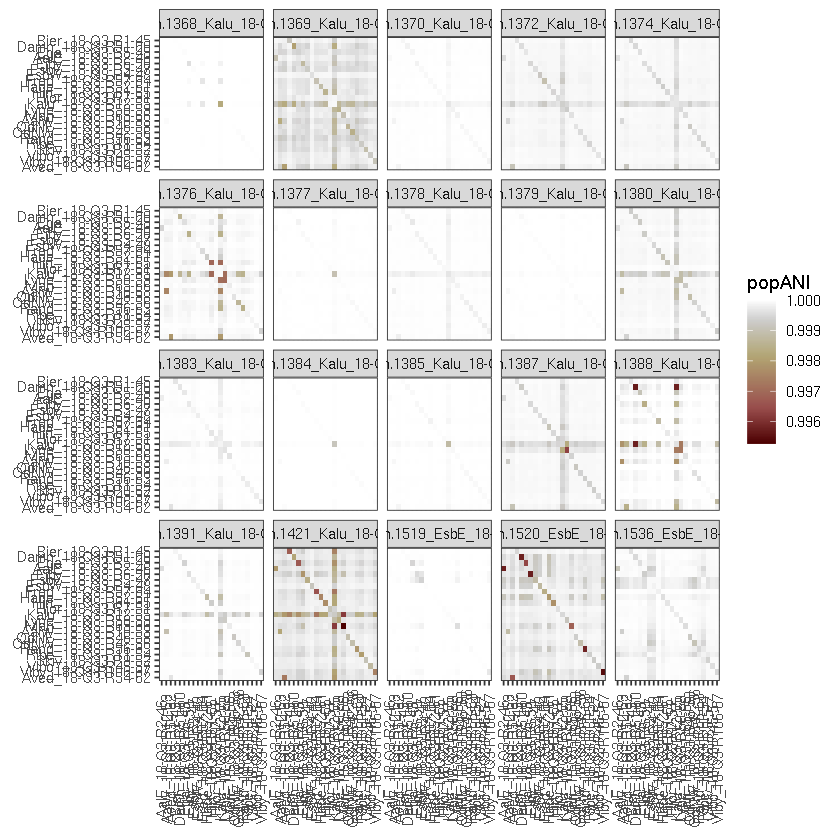

In [44]:
pop_long <- melt(all_ani_values$pop)
batch_1 <- unique(pop_long$genome)[1:20]
batch_2 <- unique(pop_long$genome)[21:40]
batch_3 <- unique(pop_long$genome)[41:55]

pop_long_p_1 <- ggplot(data=pop_long[genome %in% batch_1], aes(x=factor(sample_name), y=factor(variable), fill=value)) +
    geom_tile() +
    labs(x="Sample name", y="Sample Name") +
    theme(
        axis.text.x = element_text(angle=90, vjust=0.5, hjust=0.5),
        axis.title.x = element_blank(),
        axis.title.y = element_blank()
    ) + 
    facet_wrap(~genome) +
    scico::scale_fill_scico(palette="bilbao", direction = -1, name="popANI")

pop_long_p_1
ggsave("singleton_genomes_population_ani_1.png", width=14, height=12, dpi=600)

pop_long_p_2 <- ggplot(data=pop_long[genome %in% batch_2], aes(x=factor(sample_name), y=factor(variable), fill=value)) +
    geom_tile() +
    labs(x="Sample name", y="Sample Name") +
    theme(
        axis.text.x = element_text(angle=90, vjust=0.5, hjust=0.5),
        axis.title.x = element_blank(),
        axis.title.y = element_blank()
    ) + facet_wrap(~genome) +
    scico::scale_fill_scico(palette="bilbao", direction = -1, name="popANI")

ggsave("singleton_genomes_population_ani_2.png", width=14, height=12, dpi=600)

pop_long_p_3 <- ggplot(data=pop_long[genome %in% batch_3], aes(x=factor(sample_name), y=factor(variable), fill=value)) +
    geom_tile() +
    labs(x="Sample name", y="Sample Name") +
    theme(
        axis.text.x = element_text(angle=90, vjust=0.5, hjust=0.5),
        axis.title.x = element_blank(),
        axis.title.y = element_blank()
    ) + facet_wrap(~genome) +
    scico::scale_fill_scico(palette="bilbao", direction = -1, name="popANI")

ggsave("singleton_genomes_population_ani_3.png", width=14, height=12, dpi=600)

In [46]:
sub_long <- melt(all_ani_values$sub)
batch_1 <- unique(sub_long$genome)[1:20]
batch_2 <- unique(sub_long$genome)[21:40]
batch_3 <- unique(sub_long$genome)[41:55]

sub_long_p_1 <- ggplot(data=sub_long[genome %in% batch_1], aes(x=factor(sample_name), y=factor(variable), fill=value)) +
    geom_tile() +
    labs(x="Sample name", y="Sample Name") +
    theme(
        axis.text.x = element_text(angle=90, vjust=0.5, hjust=0.5),
        axis.title.x = element_blank(),
        axis.title.y = element_blank()
    ) + facet_wrap(~genome) +
    scico::scale_fill_scico(palette="bilbao", direction = -1, name="subPopANI")

ggsave("singleton_genomes_sub_population_ani_1.png", width=14, height=12, dpi=600)

sub_long_p_2 <- ggplot(data=sub_long[genome %in% batch_2], aes(x=factor(sample_name), y=factor(variable), fill=value)) +
    geom_tile() +
    labs(x="Sample name", y="Sample Name") +
    theme(
        axis.text.x = element_text(angle=90, vjust=0.5, hjust=0.5),
        axis.title.x = element_blank(),
        axis.title.y = element_blank()
    ) + facet_wrap(~genome) +
    scico::scale_fill_scico(palette="bilbao", direction = -1, name="subPopANI")

ggsave("singleton_genomes_sub_population_ani_2.png", width=14, height=12, dpi=600)

sub_long_p_3 <- ggplot(data=sub_long[genome %in% batch_3], aes(x=factor(sample_name), y=factor(variable), fill=value)) +
    geom_tile() +
    labs(x="Sample name", y="Sample Name") +
    theme(
        axis.text.x = element_text(angle=90, vjust=0.5, hjust=0.5),
        axis.title.x = element_blank(),
        axis.title.y = element_blank()
    ) + facet_wrap(~genome) +
    scico::scale_fill_scico(palette="bilbao", direction = -1, name="subPopANI")

ggsave("singleton_genomes_sub_population_ani_3.png", width=14, height=12, dpi=600)

Warning message in melt.data.table(all_ani_values$sub):
“To be consistent with reshape2's melt, id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns [SampleID, sra_id, sample_name, genome]. Consider providing at least one of 'id' or 'measure' vars in future.”